
**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: ML Ops**

Tecnológico de Monterrey
___


## EDA Anfibios en Polonia:
El presente conjunto de datos a analizar está relacionado con la presencia de anfibios en diferentes tipos de aguas. Estos datos fueron recopilados para los informes de impacto ambiental para dos proyectos viales planificados en Polonia. 

El conjunto de datos es un problema de clasificación de etiquetas múltiples. El objetivo es predecir la presencia de especies de anfibios cerca de los embalses de agua basándose en características obtenidas de sistemas SIG e imágenes de satélite (los datos, no las imágenes).

NOTA: se usa mucho el  termino embalse, eso hace referencia a un cuerpo de agua formado por una construcción en el lecho de un río o arroyo que cierra parcial o totalmente su cauce. (fuente: https://es.wikipedia.org/wiki/Embalse).


### Variables:

1. **ID**: Un identificador único para cada registro. (Es una variable entera que no se utiliza en los cálculos.)
   
2. **Motorway (MV)**: Variable categórica que indica si hay una autopista cercana. 

3. **Surface of water reservoir (SR)**: Variable numérica que representa el área en metros cuadrados de los cuerpos de agua cercanos. (Cuanto mayor es la superficie, más probable es que algunos de estos cuerpos de agua sean adecuados para la cría de anfibios.)

4. **Number of reservoirs (NR)**: Variable numérica que indica el número de cuerpos de agua en el hábitat. (Cuantos más cuerpos de agua haya, mayor es la probabilidad de que sean adecuados para los anfibios.)

5. **Type of reservoir (TR)**: Variable categórica que clasifica los cuerpos de agua en varias categorías (naturales, industriales, etc.). Estos tipos determinan si el agua es favorable o no para los anfibios.

    1. **Reservorios naturales o antropogénicos**: 

    2. **Reservorios recientemente formados**: 

    3. **Estanques de sedimentación**: 

    4. **Reservorios cercanos a viviendas**: 

    5. **Reservorios tecnológicos**: 

    6. **Reservorios en jardines**: 

    7. **Trincheras o zanjas**: 

    8. **Praderas húmedas o zonas inundadas**: 

    9. **Valles de ríos**: 

    10. **Riachuelos y arroyos**: 
    
    11. Del 11 en adelante no se especifica.




6. **Vegetation in reservoir (VR)**: Indica la presencia de vegetación en los cuerpos de agua. Cuanta más vegetación haya, mayor será la posibilidad de que los anfibios usen estos cuerpos de agua como hábitat de cría.

7. **Surroundings 1, 2 y 3 (SUR1, SUR2, SUR3)**: Variables categóricas que representan el tipo de cobertura de tierra dominante alrededor del cuerpo de agua. Esto puede incluir áreas boscosas, tierras agrícolas, áreas urbanas, entre otros, que influyen en la calidad del hábitat para los anfibios.

8. **Use of water reservoir (UR)**: Clasifica el uso del cuerpo de agua, desde sin uso humano hasta usos recreativos o industriales. Los cuerpos de agua no utilizados por el ser humano son más atractivos para los anfibios.

9. **Fishing (FR)**: Indica si hay presencia de pesca en los cuerpos de agua. La pesca intensa no es favorable para los anfibios.

10. **Access to undeveloped areas (OR)**: Proporción de acceso al área sin desarrollar desde los bordes del cuerpo de agua. Cuanto mayor es el acceso, mejor es para los anfibios.

11. **Distance to roads (RR)**: Distancia mínima entre el cuerpo de agua y las carreteras. Cuanto más lejos estén las carreteras, mayor será la seguridad para los anfibios.

12. **Building development (BR)**: Distancia mínima a las construcciones cercanas. Los edificios cercanos tienden a ser desfavorables para los anfibios.

13. **Maintenance status (MR)**: Describe el estado de mantenimiento del cuerpo de agua, desde limpio hasta muy sucio. Un mantenimiento deficiente afecta negativamente el ecosistema.

14. **Shore type (CR)**: Tipo de orilla del cuerpo de agua (natural o de concreto). Las orillas de concreto suelen ser una barrera para los anfibios.

15. **Labels (1-7)**: Estas variables categóricas indican la presencia o ausencia de varias especies de anfibios:

    - **Label 1 - Green frogs (Ranas verdes)**

    - **Label 2 - Brown frogs (Ranas marrones)**

    - **Label 3 - Common toad (Sapo común)**

    - **Label 4 - Fire-bellied toad (Sapo de vientre de fuego)**

    - **Label 5 - Tree frog (Rana arborícola)**

    - **Label 6 - Common newt (Tritón común)**

    - **Label 7 - Great crested newt (Tritón crestado)**



Fuente: https://archive.ics.uci.edu/dataset/528/amphibians

#### Importación de Librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importacion de los datos
# esta separado por ;
#file_path="dataset.csv" # si lo tenemos en la misma carpeta;

file_path="file_path = '../data/extracted/amphibians.csv"
df = pd.read_csv(file_path, delimiter=';', skiprows=1)
df_tipos = pd.read_csv(file_path, delimiter=';', nrows=2, header=None)
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


In [3]:
cr_df = df.copy()# copia de seguridad
cr_df.info() #resumen de tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    int64 
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int64 
 3   NR                  189 non-null    int64 
 4   TR                  189 non-null    int64 
 5   VR                  189 non-null    int64 
 6   SUR1                189 non-null    int64 
 7   SUR2                189 non-null    int64 
 8   SUR3                189 non-null    int64 
 9   UR                  189 non-null    int64 
 10  FR                  189 non-null    int64 
 11  OR                  189 non-null    int64 
 12  RR                  189 non-null    int64 
 13  BR                  189 non-null    int64 
 14  MR                  189 non-null    int64 
 15  CR                  189 non-null    int64 
 16  Green frogs         189 no

In [4]:
# Carguemos las definiciones que nos dan
df_tipos = pd.read_csv(file_path, delimiter=';', nrows=2, header=None)
x = df_tipos.T
x.columns = ["tipo", "nombre"]
x

,tipo,nombre
0,Integer,ID
1,Categorical,Motorway
2,Numerical,SR
3,Numerical,NR
4,Categorical,TR
5,Categorical,VR
6,Categorical,SUR1
7,Categorical,SUR2
8,Categorical,SUR3
9,Categorical,UR


In [5]:
# Dividir el DataFrame original en categorías numéricas y categóricas
categorical_columns = x[x['tipo'] == 'Categorical']['nombre'].values
numerical_columns = x[x['tipo'] == 'Numerical']['nombre'].values
ordinal_columns = x[x['tipo'] == 'Ordinal']['nombre'].values

# Aplicar describe para los datos numéricos y ordinales
describe_numerical = df[numerical_columns].describe()
describe_ordinal = df[ordinal_columns].describe()
describe_categorical =df[categorical_columns].describe()
# Mostrar resultados
print("Descripción de datos numéricos:")
print(describe_numerical)

print("\nDescripción de datos ordinales:")
print(describe_ordinal)


Descripción de datos numéricos:
                  SR          NR          OR
count     189.000000  189.000000  189.000000
mean     9633.227513    1.566138   89.962963
std     46256.078309    1.544419   19.904926
min        30.000000    1.000000   25.000000
25%       300.000000    1.000000   99.000000
50%       700.000000    1.000000  100.000000
75%      3300.000000    1.000000  100.000000
max    500000.000000   12.000000  100.000000

Descripción de datos ordinales:
               RR          BR
count  189.000000  189.000000
mean     2.333333    2.502646
std      2.520132    2.640971
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      5.000000    5.000000
max     10.000000   10.000000


In [6]:
print("Porcentaje de Valores Faltantes por Columna:")
df_faltantes_porcentajes= cr_df.isnull().sum() / len(cr_df) * 100
df_faltantes_porcentajes.apply(lambda x: f"{x:.2f}%")

Porcentaje de Valores Faltantes por Columna:


ID                    0.00%
Motorway              0.00%
SR                    0.00%
NR                    0.00%
TR                    0.00%
VR                    0.00%
SUR1                  0.00%
SUR2                  0.00%
SUR3                  0.00%
UR                    0.00%
FR                    0.00%
OR                    0.00%
RR                    0.00%
BR                    0.00%
MR                    0.00%
CR                    0.00%
Green frogs           0.00%
Brown frogs           0.00%
Common toad           0.00%
Fire-bellied toad     0.00%
Tree frog             0.00%
Common newt           0.00%
Great crested newt    0.00%
dtype: object

#### Gráficos de los distintos tipos de datos
Vamos a visualizar los datos antes de cualquier análisis complejo, esto va ayuda a identificar patrones, distribuciones, y posibles problemas como outliers.

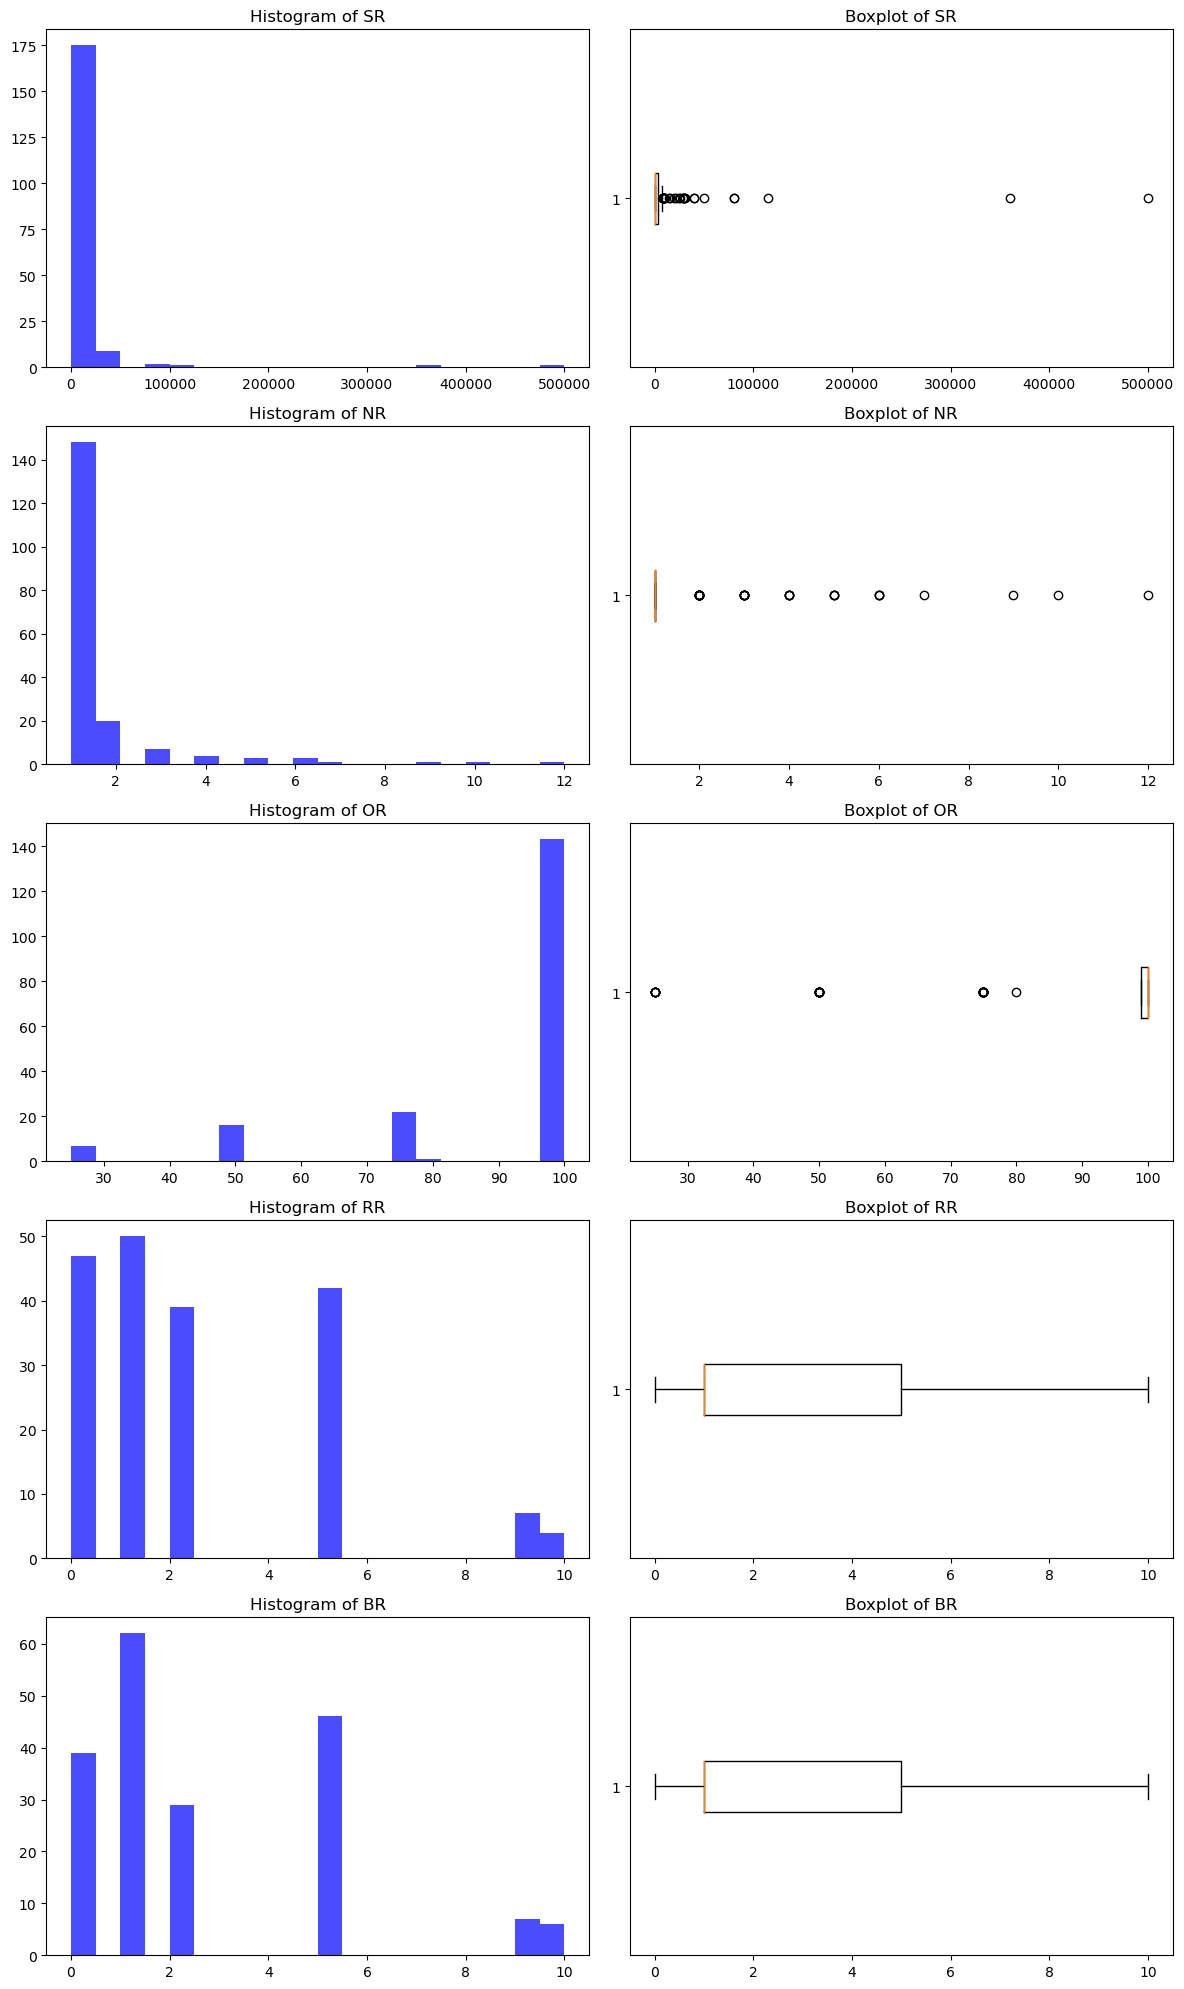

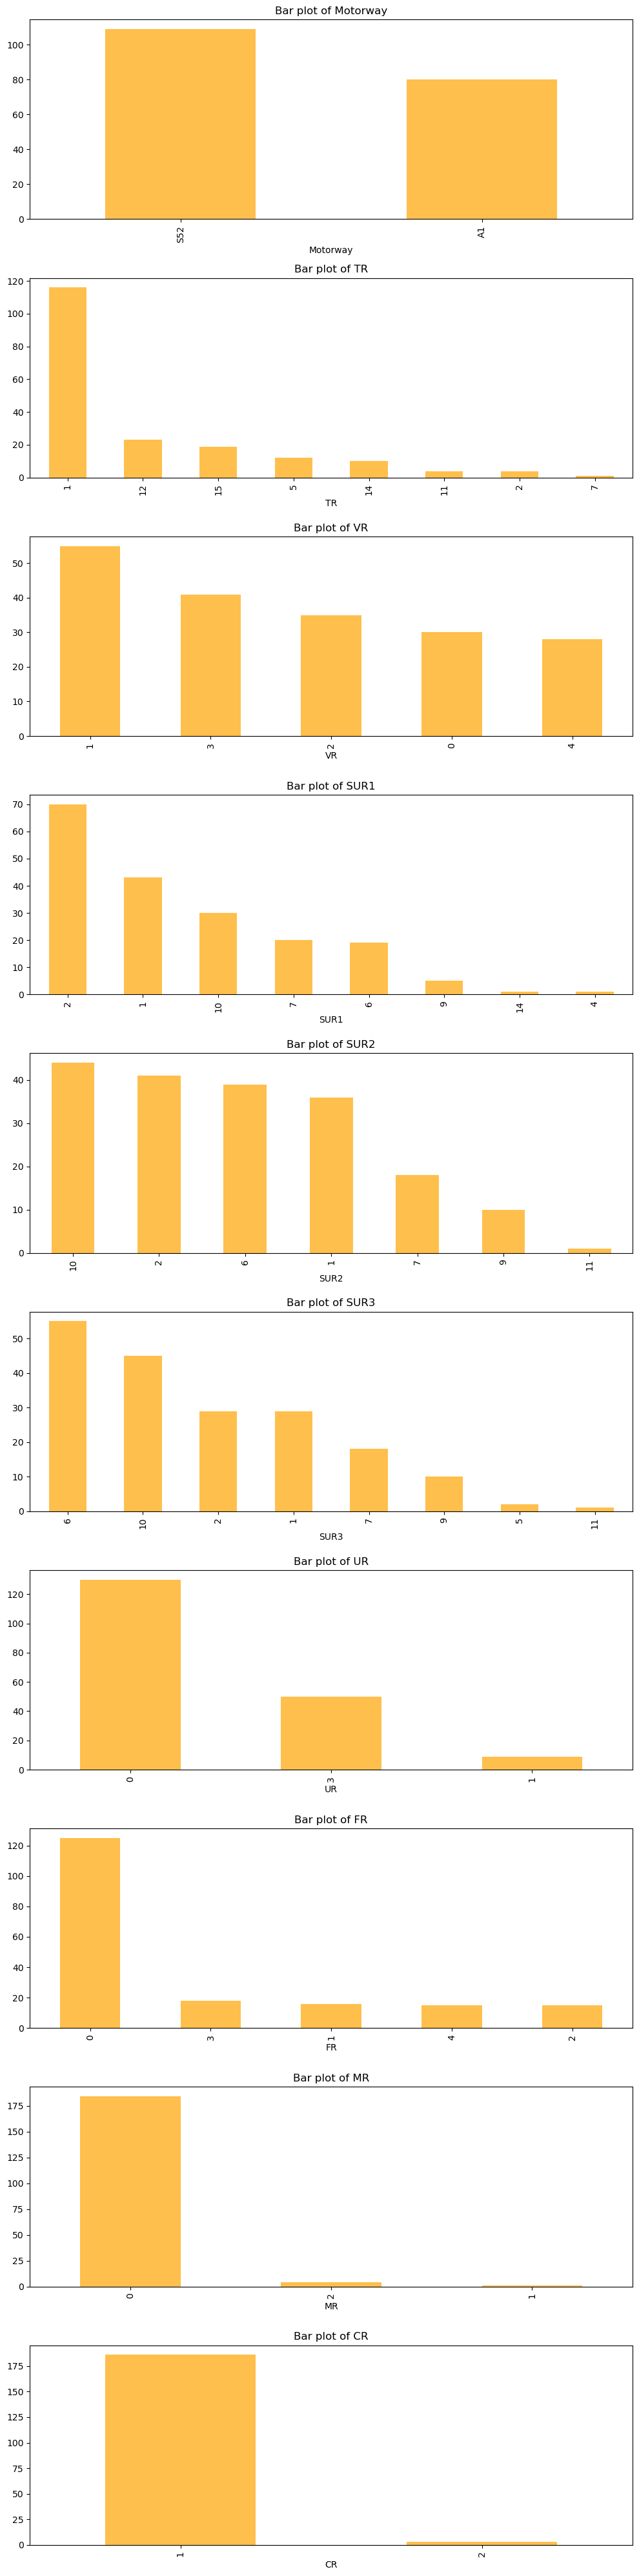

In [7]:
import matplotlib.pyplot as plt

# Filtrar columnas numéricas y ordinales
numerical_columns = x[x['tipo'].isin(['Numerical', 'Ordinal'])]['nombre'].values
categorical_columns = x[x['tipo'] == 'Categorical']['nombre'].values

# Crear gráficos para las columnas numéricas y ordinales
fig, axs = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 4))

for i, column in enumerate(numerical_columns):
    try:
        # Histograma
        axs[i, 0].hist(df[column].dropna(), bins=20, color='blue', alpha=0.7)
        axs[i, 0].set_title(f'Histogram of {column}')
        
        # Boxplot
        axs[i, 1].boxplot(df[column].dropna(), vert=False)
        axs[i, 1].set_title(f'Boxplot of {column}')
    except Exception as e:
        axs[i, 0].set_title(f'Error processing {column}')
        axs[i, 1].set_title(f'Error processing {column}')

plt.tight_layout()
plt.show()

# Crear gráficos de barras para las columnas categóricas
fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 4))

for i, column in enumerate(categorical_columns):
    try:
        # Gráfico de barras
        df[column].value_counts().plot(kind='bar', ax=axs[i], color='orange', alpha=0.7)
        axs[i].set_title(f'Bar plot of {column}')
    except Exception as e:
        axs[i].set_title(f'Error processing {column}')

plt.tight_layout()
plt.show()


#### Matrz de Correlación de Person

          SR        NR        OR        RR        BR
SR  1.000000  0.652757  0.009107 -0.056392 -0.057961
NR  0.652757  1.000000 -0.034093 -0.115709 -0.110566
OR  0.009107 -0.034093  1.000000  0.387495  0.353696
RR -0.056392 -0.115709  0.387495  1.000000  0.792273
BR -0.057961 -0.110566  0.353696  0.792273  1.000000


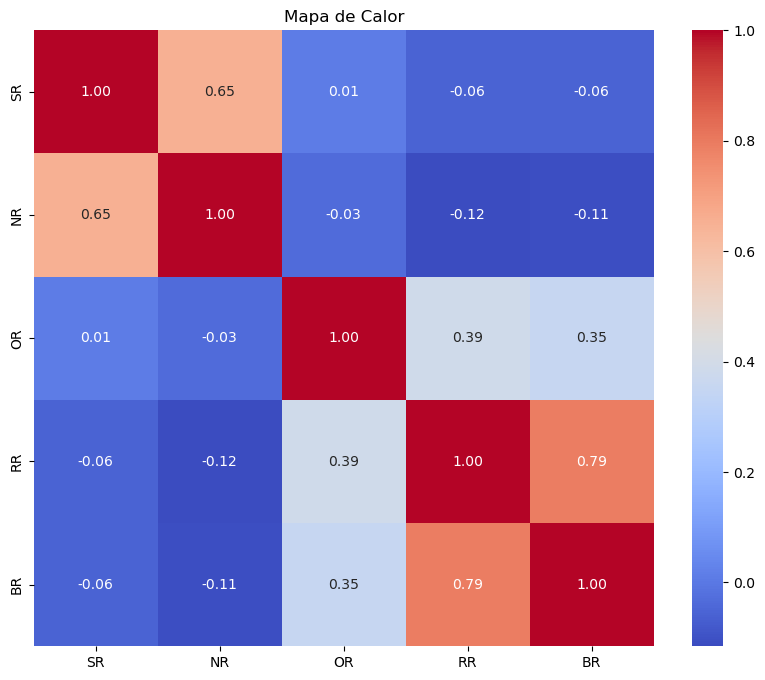

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#numéricas y ordinales
numerical_ordinal_columns = x[x['tipo'].isin(['Numerical', 'Ordinal'])]['nombre'].values

#Matriz de correlación
correlation_matrix = df[numerical_ordinal_columns].corr()
print(correlation_matrix)
# Heat de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor')
plt.show()

#### Especies da Ranas por Tipo de Carretera

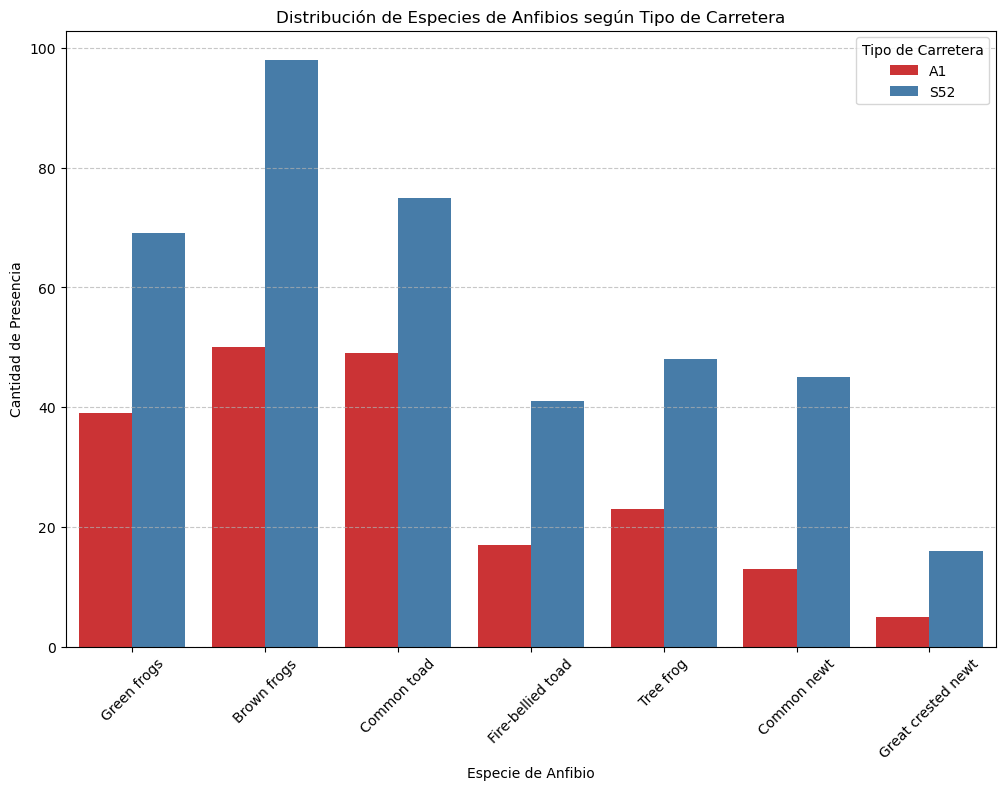

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Las columnas de las etiquetas de los anfibios
label_columns = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 
                 'Tree frog', 'Common newt', 'Great crested newt']

# Función para crear gráficos de barras basados en diferentes tipos de agrupaciones
def plot_amphibians_by_group(group_col, title, hue_title, palette='Set2'):
    # Crear un DataFrame con las etiquetas y la variable de agrupación
    df_labels_group = df.melt(id_vars=group_col, value_vars=label_columns, 
                              var_name='Especie', value_name='Presencia')

    # Filtrar solo las filas donde hay presencia de la especie (1)
    df_labels_group = df_labels_group[df_labels_group['Presencia'] == 1]

    # Graficar la presencia de anfibios según el tipo de agrupación
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_labels_group, x='Especie', hue=group_col, palette=palette)
    plt.title(title)
    plt.xlabel('Especie de Anfibio')
    plt.ylabel('Cantidad de Presencia')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.legend(title=hue_title)
    plt.show()
# Gráfico basado en el tipo de carretera
plot_amphibians_by_group('Motorway', 
                         'Distribución de Especies de Anfibios según Tipo de Carretera', 
                         'Tipo de Carretera', palette='Set1')


Se Puede apreciar mayor cantidad de ranas presentes en las muestras tomadas en la carretera S52.

#### Prueba T
Para dos muesstras independientes, tenemos:

La ecuación para la prueba T para dos muestras independientes con varianzas desiguales (t-test de Welch) es:

$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

Donde:
- $( {X}_1 ) y ( \bar{X}_2)$ son las medias de los dos grupos (A1 y S52).
- $( s_1^2 )  y  ( s_2^2 )$ son las varianzas de los dos grupos.
- $( n_1 ) y ( n_2 )$ son los tamaños de muestra de cada grupo.



In [10]:
from scipy.stats import ttest_ind

#Prueba T (comparación de medias de presencia de ranas entre carreteras)

# Creamos una columna con el total de ranas presentes por cada fila
df['total_ranas'] = df[label_columns].sum(axis=1)

# Filtrar las carreteras más comunes (por ejemplo, A1 y S52)
group_A1 = df[df['Motorway'] == 'A1']['total_ranas']
group_S52 = df[df['Motorway'] == 'S52']['total_ranas']

# Realizar la prueba T para comparar las medias de las presencias de ranas entre A1 y S52
t_stat, p_value_t = ttest_ind(group_A1, group_S52, equal_var=False)  # Asumimos varianzas desiguales

# Mostrar los resultados de ambas pruebas
(t_stat, p_value_t)


(-4.5771989380893014, 8.656244826124614e-06)

El valor de p es muy bajo (menor que 0.05), lo que indica que la diferencia en las medias de la presencia de ranas entre las carreteras **A1** y **S52** es **estadísticamente significativa**. Esto significa que la cantidad media de ranas en estos dos tipos de carreteras es significativamente diferente.

#### Cantidad de especies de ranas por muestras
Sumemos los 4 tipos de ranas **(Green frogs, Brown frogs, Common toad, Fire-bellied toad)**.
veamos la distribución de esta nueva variable:

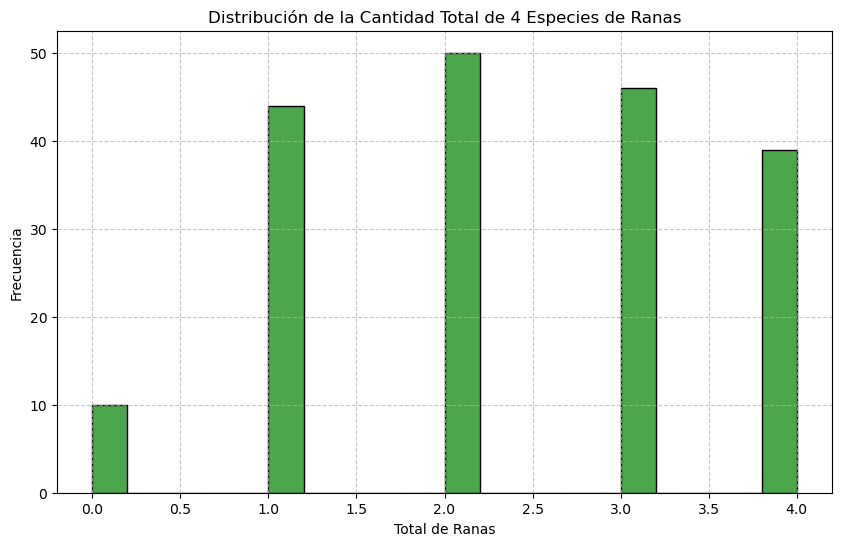

count    189.000000
mean       2.317460
std        1.191621
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: total_selected_ranas, dtype: float64

In [11]:
# Vamos a crear una nueva variable que represente la suma de 4 tipos de ranas específicas
selected_ranas = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad']

# Crear una nueva columna que sume estas especies
df['total_selected_ranas'] = df[selected_ranas].sum(axis=1)

# Mostrar la distribución de esta nueva variable
plt.figure(figsize=(10, 6))
sns.histplot(df['total_selected_ranas'], bins=20, kde=False, color='green', alpha=0.7)
plt.title('Distribución de la Cantidad Total de 4 Especies de Ranas')
plt.xlabel('Total de Ranas')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Estadísticas descriptivas de la nueva variable
df['total_selected_ranas'].describe()


En este caso, podemos ver que se tiene una mayor probabilidad de que en cada registro tengamos más de una especie de anfibio.

#### ANOVA

A diferencia de las variables numéricas, para las variables categóricas no podemos calcular una matriz de correlación directamente.

Sin embargo, podemos analizar la relación entre una variable categórica y una variable numérica usando ANOVA. ANOVA es una prueba estadística que usamos cuando queremos comparar tres o más grupos para ver si sus promedios (medias) son diferentes entre sí.

In [12]:
from scipy.stats import f_oneway

# Variables numéricas y categóricas de entorno
categorical_columns = ['Motorway', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3']

#
# 2. ANOVA para comparar cómo las variables categóricas afectan a cada especie
anova_results = {}
for species in label_columns:
    anova_results[species] = {}
    for cat_col in categorical_columns:
        # Realizar ANOVA comparando la presencia de la especie según los valores categóricos
        groups = [df[df[cat_col] == category][species] for category in df[cat_col].unique()]
        f_stat, p_val = f_oneway(*groups)
        anova_results[species][cat_col] = p_val

# Convertir los resultados de ANOVA en un DataFrame para mejor interpretación
anova_df = pd.DataFrame(anova_results)

# Transponer el DataFrame para que las especies sean filas y las variables categóricas sean columnas
anova_table = anova_df.T

# Mostrar los resultados en una tabla clara
anova_table

,Motorway,TR,VR,SUR1,SUR2,SUR3
Green frogs,0.046063,4.041669e-07,0.275236,0.695882,0.375218,0.249242
Brown frogs,0.000004,7.120329e-02,0.016496,0.115456,0.222877,0.568225
Common toad,0.282303,5.828037e-03,0.512501,0.370842,0.151134,0.596457
Fire-bellied toad,0.015826,4.352201e-02,0.366410,0.595075,0.875455,0.862738
Tree frog,0.032118,6.538898e-03,0.057823,0.129830,0.419990,0.656365
Common newt,0.000191,3.601439e-03,0.229791,0.381276,0.380887,0.708847
Great crested newt,0.069107,7.353817e-03,0.522277,0.027407,0.145761,0.593065


Interpretación:

**Green frogs (Ranas verdes)**:
- **Motorway (p = 0.046)**: El tipo de carretera cercana afecta significativamente a las ranas verdes, con un p-valor menor a 0.05. Esto significa que **al menos un tipo de carretera tiene una presencia diferente** de ranas verdes en comparación con otros tipos de carreteras.
- **TR (Tipo de embalse) (p < 0.001)**: El tipo de embalse influye mucho en la presencia de ranas verdes. Un p-valor tan pequeño indica que **el tipo de embalse es un factor clave** para esta especie.
- **VR (Vegetación) (p = 0.275)**: No hay evidencia significativa de que la vegetación afecte la presencia de ranas verdes (p > 0.05).
- **SUR1, SUR2, SUR3**: Estas variables, que describen el entorno alrededor del embalse, tampoco tienen un impacto significativo (todos los p-valores son mayores a 0.05).

**Brown frogs (Ranas marrones)**:
- **Motorway (p < 0.001)**: Las ranas marrones son significativamente afectadas por el tipo de carretera. Este p-valor extremadamente pequeño nos indica que **el tipo de carretera juega un papel clave en la presencia de esta especie**.
- **TR (Tipo de embalse) (p = 0.071)**: Aunque el p-valor es cercano a 0.05, no es lo suficientemente pequeño como para decir que el tipo de embalse afecta significativamente a las ranas marrones.
- **VR (Vegetación) (p = 0.016)**: La vegetación sí afecta significativamente a las ranas marrones. Esto implica que las ranas marrones prefieren embalses con ciertos tipos de vegetación.
- **SUR1, SUR2, SUR3**: Ninguna de estas variables tiene un impacto significativo sobre las ranas marrones (p > 0.05).

**Common toad (Sapo común)**:
- **Motorway (p = 0.282)**: El tipo de carretera no afecta significativamente a los sapos comunes (p > 0.05).
- **TR (Tipo de embalse) (p = 0.005)**: El tipo de embalse afecta significativamente a los sapos comunes. Este p-valor bajo indica que **la presencia de sapos comunes está influenciada por el tipo de embalse**.
- **VR (Vegetación) (p = 0.512)**: No hay evidencia de que la vegetación afecte la presencia de sapos comunes (p > 0.05).
- **SUR1, SUR2, SUR3**: Estas variables tampoco tienen un impacto significativo sobre la presencia del sapo común.

**Fire-bellied toad (Sapo de vientre de fuego)**:
- **Motorway (p = 0.016)**: El tipo de carretera afecta significativamente a los sapos de vientre de fuego. Esto implica que estos sapos prefieren o evitan ciertos tipos de carreteras.
- **TR (Tipo de embalse) (p = 0.043)**: El tipo de embalse también tiene un impacto significativo en la presencia de sapos de vientre de fuego, pero el efecto es menos fuerte en comparación con otras especies.
- **VR (Vegetación) (p = 0.366)**: La vegetación no afecta significativamente a esta especie.
- **SUR1, SUR2, SUR3**: Ninguna de estas variables tiene un impacto significativo.

**Tree frog (Rana arborícola)**:
- **Motorway (p = 0.032)**: El tipo de carretera afecta significativamente a las ranas arborícolas. El p-valor menor a 0.05 indica que hay diferencias entre los tipos de carreteras en cuanto a la presencia de esta especie.
- **TR (Tipo de embalse) (p = 0.007)**: El tipo de embalse también es un factor significativo para las ranas arborícolas. El p-valor indica que esta especie se ve influenciada por ciertos tipos de embalses.
- **VR (Vegetación) (p = 0.057)**: La vegetación tiene una influencia moderada, pero no alcanza el umbral de significancia (p-valor cercano a 0.05).
- **SUR1, SUR2, SUR3**: Estas variables no tienen un impacto significativo.

**Common newt (Tritón común)**:
- **Motorway (p < 0.001)**: El tipo de carretera tiene un impacto muy significativo en la presencia del tritón común, con un p-valor extremadamente pequeño.
- **TR (Tipo de embalse) (p = 0.004)**: El tipo de embalse también es un factor importante para esta especie.
- **VR (Vegetación) (p = 0.230)**: La vegetación no tiene un impacto significativo sobre la presencia del tritón común.
- **SUR1, SUR2, SUR3**: Ninguna de estas variables es significativa para el tritón común.

**Great crested newt (Tritón crestado)**:
- **Motorway (p = 0.069)**: Aunque el p-valor es bajo, no es lo suficientemente significativo para decir que el tipo de carretera afecta a los tritones crestados.
- **TR (Tipo de embalse) (p = 0.007)**: El tipo de embalse tiene un impacto significativo en la presencia del tritón crestado.
- **VR (Vegetación) (p = 0.522)**: La vegetación no afecta significativamente a esta especie.
- **SUR1 (p = 0.027)**: El tipo de cobertura del entorno **SUR1** tiene un impacto significativo en la presencia del tritón crestado.
- **SUR2, SUR3**: No son significativas.


#### PCA
 reducir la dimensionalidad y conservar solo la información más relevante.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#volamos a definir las numericas
numeric_columns = ['SR', 'NR', 'OR', 'RR', 'BR']

#Normalización de los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[numeric_columns])

#Aplicación de PCA para conservar el 95% de la varianza
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(normalized_data)

# Número de componentes principales
n_components = pca.n_components_

# Varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
n_components, explained_variance_ratio


(4, array([0.42235979, 0.32011012, 0.14720549, 0.06897722]))

#### Conclusión
Este análisis, basado en las muestras de las especies y los diferentes tipos de ranas existentes, busca identificar los patrones principales que ayuden a determinar qué tipo de anfibio aparecería en diversas zonas, según su estado natural y el nivel de intervención humana. Esto facilitaría, mediante modelos predictivos, la identificación de los tipos de anfibios que se espera encontrar al analizar nuevas áreas. No solo eso, tambipen podemos encontrar mayor cantidad de anfibios basados en el tipo de carretera, aún cuando ambos presentan la misma distribución de especies.
